# Image scaling using cuda
This notebooks is aimed to be run in Google Colaboratory

## Dependencies installation

In [1]:
!apt-get install gcc-5 g++-5 -y -qq;
!ln -s /usr/bin/gcc-5 /usr/local/cuda/bin/gcc;
!ln -s /usr/bin/g++-5 /usr/local/cuda/bin/g++;
!pip install git+git://github.com/andreinechaev/nvcc4jupyter.git
%load_ext nvcc_plugin

Selecting previously unselected package gcc-5-base:amd64.
(Reading database ... 144786 files and directories currently installed.)
Preparing to unpack .../0-gcc-5-base_5.5.0-12ubuntu1_amd64.deb ...
Unpacking gcc-5-base:amd64 (5.5.0-12ubuntu1) ...
Selecting previously unselected package libisl15:amd64.
Preparing to unpack .../1-libisl15_0.18-4_amd64.deb ...
Unpacking libisl15:amd64 (0.18-4) ...
Selecting previously unselected package cpp-5.
Preparing to unpack .../2-cpp-5_5.5.0-12ubuntu1_amd64.deb ...
Unpacking cpp-5 (5.5.0-12ubuntu1) ...
Selecting previously unselected package libasan2:amd64.
Preparing to unpack .../3-libasan2_5.5.0-12ubuntu1_amd64.deb ...
Unpacking libasan2:amd64 (5.5.0-12ubuntu1) ...
Selecting previously unselected package libmpx0:amd64.
Preparing to unpack .../4-libmpx0_5.5.0-12ubuntu1_amd64.deb ...
Unpacking libmpx0:amd64 (5.5.0-12ubuntu1) ...
Selecting previously unselected package libgcc-5-dev:amd64.
Preparing to unpack .../5-libgcc-5-dev_5.5.0-12ubuntu1_amd64.de

## Device query

In [2]:
# !nvidia-smi
%cd /usr/local/cuda-10.1/samples/1_Utilities/deviceQuery/
!make
!./deviceQuery

/usr/local/cuda-10.1/samples/1_Utilities/deviceQuery
/usr/local/cuda-10.1/bin/nvcc -ccbin g++ -I../../common/inc  -m64    -gencode arch=compute_30,code=sm_30 -gencode arch=compute_35,code=sm_35 -gencode arch=compute_37,code=sm_37 -gencode arch=compute_50,code=sm_50 -gencode arch=compute_52,code=sm_52 -gencode arch=compute_60,code=sm_60 -gencode arch=compute_61,code=sm_61 -gencode arch=compute_70,code=sm_70 -gencode arch=compute_75,code=sm_75 -gencode arch=compute_75,code=compute_75 -o deviceQuery.o -c deviceQuery.cpp
/usr/local/cuda-10.1/bin/nvcc -ccbin g++   -m64      -gencode arch=compute_30,code=sm_30 -gencode arch=compute_35,code=sm_35 -gencode arch=compute_37,code=sm_37 -gencode arch=compute_50,code=sm_50 -gencode arch=compute_52,code=sm_52 -gencode arch=compute_60,code=sm_60 -gencode arch=compute_61,code=sm_61 -gencode arch=compute_70,code=sm_70 -gencode arch=compute_75,code=sm_75 -gencode arch=compute_75,code=compute_75 -o deviceQuery deviceQuery.o 
mkdir -p ../../bin/x86_64/lin

## Download code and build it

In [3]:
%cd /content
!git clone https://github.com/crdgonzalezca/parallel_computing.git
%cd /content/parallel_computing
!git checkout cuda

/content
Cloning into 'parallel_computing'...
remote: Enumerating objects: 194, done.
remote: Counting objects: 100% (194/194), done.
remote: Compressing objects: 100% (147/147), done.
remote: Total 194 (delta 88), reused 142 (delta 44), pack-reused 0
Receiving objects: 100% (194/194), 10.95 MiB | 12.89 MiB/s, done.
Resolving deltas: 100% (88/88), done.
/content/parallel_computing
Branch 'cuda' set up to track remote branch 'cuda' from 'origin'.
Switched to a new branch 'cuda'


In [4]:
%cd /content/parallel_computing/cuda
!git pull origin cuda
!make

/content/parallel_computing/cuda
From https://github.com/crdgonzalezca/parallel_computing
 * branch            cuda       -> FETCH_HEAD
Already up to date.
/usr/local/cuda-10.1/bin/nvcc -ccbin g++ -I/usr/local/cuda/samples/common/inc  -m64    -gencode arch=compute_30,code=sm_30 -gencode arch=compute_35,code=sm_35 -gencode arch=compute_37,code=sm_37 -gencode arch=compute_50,code=sm_50 -gencode arch=compute_52,code=sm_52 -gencode arch=compute_60,code=sm_60 -gencode arch=compute_61,code=sm_61 -gencode arch=compute_70,code=sm_70 -gencode arch=compute_75,code=sm_75 -gencode arch=compute_75,code=compute_75 -o image_scaling.o -c image_scaling.cu
/usr/local/cuda-10.1/bin/nvcc -ccbin g++   -m64      -gencode arch=compute_30,code=sm_30 -gencode arch=compute_35,code=sm_35 -gencode arch=compute_37,code=sm_37 -gencode arch=compute_50,code=sm_50 -gencode arch=compute_52,code=sm_52 -gencode arch=compute_60,code=sm_60 -gencode arch=compute_61,code=sm_61 -gencode arch=compute_70,code=sm_70 -gencode arc

In [6]:
%cd /content/parallel_computing/cuda
# Params: input_image output_image threads_per_block algorithm
!./image_scaling ../images/image3_720p.jpg ../images/result_480p.jpg 16 Bilinear

/content/parallel_computing/cuda
Performance= 12158.74 GFlop/s, Time= 0.00017054 s, Size= 2073600 Ops, WorkgroupSize= 256 threads/block, Blocks= 1350
Done


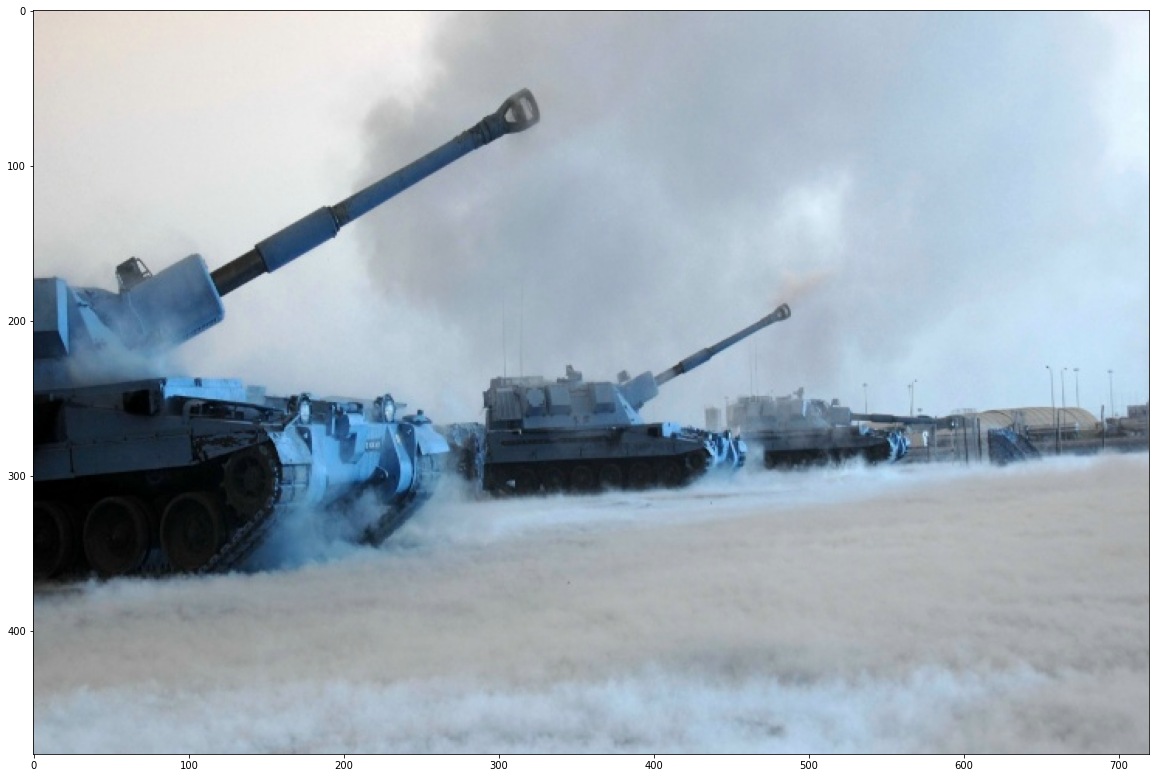

In [11]:
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

image = cv2.imread('/content/parallel_computing/images/result_480p.jpg')
fig = plt.figure(figsize=(20, 20))
plt.imshow(image)
plt.show()